# Univariate Regression

The goal is to predict a single scalar output $y \in \mathbb{R}$ from input $x$ using a model $f_\theta(x)$ with parameters $\theta$.

We select the univariate normal, which is defined over $y \in \mathbb{R}$. This distribution has two parameters (mean $\mu$ and variance $\sigma^2$).

$$
p(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-\mu)^2}{2\sigma^2}\right]
$$

We set the machine learning model to compute the mean.
$$
\mu = f_\theta(x)
$$

We choose a loss function based on the negative log-likelihood.
$$
\begin{align}
L(\theta) & = -\sum_{i=1}^{N}\log p(y_i|f_\theta(x_i), \sigma^2) \\
& = -\sum_{i=1}^{N}\log\left[ \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-f_\theta(x_i))^2}{2\sigma^2}\right] \right]
\end{align}
$$

When the train the model, we seek parameters $\hat{\theta}$ that minimize the loss.
$$
\begin{align}
\hat{\theta} & = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}\log\left[ \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(y-f_\theta(x_i))^2}{2\sigma^2}\right] \right]
  \right] \\
& = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}
  \left( \log \left[\frac{1}{\sqrt{2\pi\sigma^2}} \right]
  -\frac{(y-f_\theta(x_i))^2}{2\sigma^2} \right) \right]\\
& = \underset{\theta}{\mathrm{argmin}}\left[
  -\sum_{i=1}^{N}
  \left(
  -\frac{(y-f_\theta(x_i))^2}{2\sigma^2} \right) \right]\\
& = \underset{\theta}{\mathrm{argmin}}\left[
  \sum_{i=1}^{N} (y-f_\theta(x_i))^2 \right]\\
\end{align}
$$

Therefore, we have a **least squares loss** function.

$$
L(\theta) = \sum_{i=1}^{N} (y_i-f_\theta(x_i))^2
$$


When we perform inference, we usually want a single "best" point estimate $\hat{y}$, so we take the maximum of the predicted distribution:

$$
\hat{y} = \underset{\theta}{\mathrm{argmax}} \; p(y|f_{\hat{\theta}}(x), \sigma^2)
$$

For the univariate normal, the maximum position is determined by the mean parameter $\mu$. This is precisely what the model computed, so

$$
\hat{y} = f_{\hat{\theta}}(x)
$$

## Mean squared error (MSE)

$$
\text{MSE}(a,b) = \frac{1}{N}\sum_i^N(a_i - b_i)^2
$$

In [ ]:
import torch
from torch import nn

In [ ]:
mse = nn.MSELoss()
a = torch.tensor([1.0, 7.0])
b = torch.tensor([4.0, 2.0])
mse(a, b)

tensor(17.)

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

## Data

In [ ]:
# Data
# y = 2x + 5
N = 100
x = torch.linspace(-10, 10, N).view(-1, 1)  #(N, 1)
x.shape

torch.Size([100, 1])

In [ ]:
noise = torch.randn_like(x) * 2
y = 2*x + 5 + noise
y.shape

torch.Size([100, 1])

In [ ]:
def y_true(x):
  return 2*x + 5

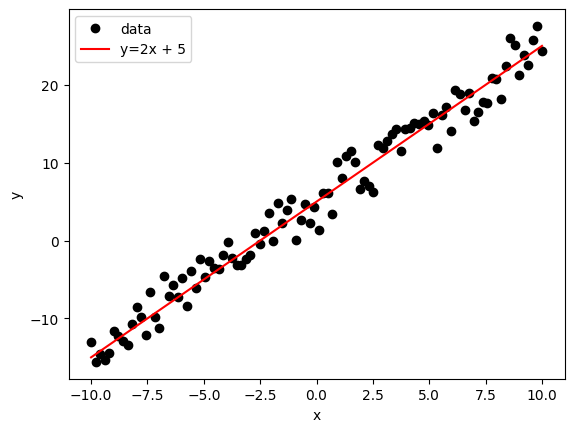

In [ ]:
plt.figure()
plt.plot(x, y, 'o', label='data', color='black')
plt.plot(x, y_true(x), '-', label='y=2x + 5', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Dataset, DataLoader

In [ ]:
class RegressionDataset(Dataset):
    def __init__(self, N=100):
        x = torch.linspace(-10, 10, N).view(-1, 1)
        noise = torch.randn_like(x) * 2
        y = 2*x + 5 + noise
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
dataset = RegressionDataset()
len(dataset)

100

In [ ]:
sample = dataset[0]
sample

(tensor([-10.]), tensor([-13.2170]))

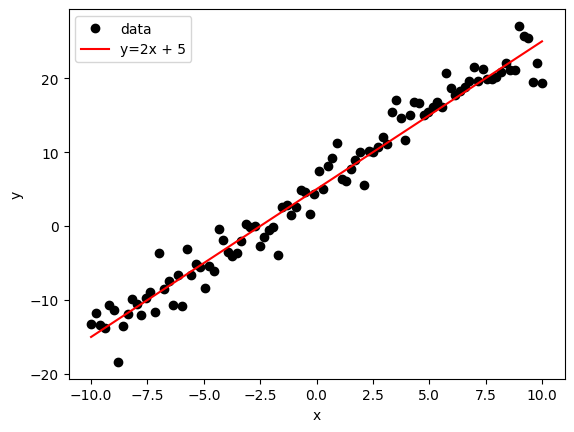

In [ ]:
plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

In [ ]:
for batch in dataloader:
  batch
  break
print(type(batch))
batch

<class 'list'>


[tensor([[-10.0000],
         [ -9.7980]]),
 tensor([[-13.2170],
         [-11.7706]])]

In [ ]:
batch = next(iter(dataloader))
batch

[tensor([[-10.0000],
         [ -9.7980]]),
 tensor([[-13.2170],
         [-11.7706]])]

In [ ]:
dataset[0]

(tensor([-10.]), tensor([-13.2170]))

In [ ]:
dataset[1]

(tensor([-9.7980]), tensor([-11.7706]))

## torch.nn

In [ ]:
layer = nn.Linear(1, 3)
layer

Linear(in_features=1, out_features=3, bias=True)

In [ ]:
inputs = batch[0]
print(inputs)
inputs.shape  # (batch_size, 1)

tensor([[-10.0000],
        [ -9.7980]])


torch.Size([2, 1])

In [ ]:
outputs = layer(inputs)
print(outputs)
outputs.shape  # (batch_size, out_features)

tensor([[9.7421, 2.1659, 6.7480],
        [9.5574, 2.1169, 6.6101]], grad_fn=<AddmmBackward0>)


torch.Size([2, 3])

In [ ]:
params = []
for p in layer.parameters():
  print(p, end='\n\n')
  params.append(p.data)

Parameter containing:
tensor([[-0.9138],
        [-0.2426],
        [-0.6827]], requires_grad=True)

Parameter containing:
tensor([ 0.6037, -0.2596, -0.0789], requires_grad=True)



In [ ]:
A = params[0]  # weight
A.shape

torch.Size([3, 1])

In [ ]:
b = params[1]  # bias
b.shape

torch.Size([3])

### nn.Linear

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

$$
y = x A^T + b
$$

- $x$: Input $(N, d_\text{in})$
- $A$: Weight matrix $(d_\text{out}, d_\text{in})$
  - $A^T$: Transpose of $A$ $(d_\text{in}, d_\text{out})$
- $b$: Bias $(d_\text{out})$

$$
(N, d_\text{in}) \times (d_\text{in}, d_\text{out}) + (d_\text{out}) \rightarrow (N, d_\text{out})
$$

In [ ]:
# (N, d_out)
intermediate = inputs @ A.T
print(intermediate)
intermediate.shape

tensor([[9.1384, 2.4255, 6.8269],
        [8.9538, 2.3765, 6.6890]])


torch.Size([2, 3])

In [ ]:
print(b)
print(b.shape)

tensor([ 0.6037, -0.2596, -0.0789])
torch.Size([3])


In [ ]:
print(intermediate[0, :])
print(intermediate[0, :] + b)

tensor([9.1384, 2.4255, 6.8269])
tensor([9.7421, 2.1659, 6.7480])


In [ ]:
print(intermediate[1, :])
print(intermediate[1, :] + b)

tensor([8.9538, 2.3765, 6.6890])
tensor([9.5574, 2.1169, 6.6101])


In [ ]:
print(outputs)

tensor([[9.7421, 2.1659, 6.7480],
        [9.5574, 2.1169, 6.6101]], grad_fn=<AddmmBackward0>)


## Broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

#### General broadcasting rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

- they are equal, or

- one of them is 1.

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes.

Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. **Note that missing dimensions are assumed to have size one**.

In [ ]:
# broadcasting
# (N, d_out) + (d_out) =>
# (N, d_out) + (1, d_out) =>
# (N, d_out) + (N, d_out) =>
# (N, d_out)
intermediate = inputs @ A.T
print(intermediate.shape)
print(b.shape)
output_manual = intermediate + b
print(output_manual.shape)

torch.Size([2, 3])
torch.Size([3])
torch.Size([2, 3])


In [ ]:
print(inputs @ A.T + b)
print()
print(layer(inputs))

tensor([[9.7421, 2.1659, 6.7480],
        [9.5574, 2.1169, 6.6101]])

tensor([[9.7421, 2.1659, 6.7480],
        [9.5574, 2.1169, 6.6101]], grad_fn=<AddmmBackward0>)


## Model

In [ ]:
# Define Model
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Linear(1, 1)

    def forward(self, x):
        return self.model(x)

In [ ]:
inputs

tensor([[-10.0000],
        [ -9.7980]])

In [ ]:
model = RegressionModel()
model(inputs)

tensor([[9.7686],
        [9.5881]], grad_fn=<AddmmBackward0>)

In [ ]:
params = []
for p in model.parameters():
  print(p)
  params.append(p.data)

Parameter containing:
tensor([[-0.8938]], requires_grad=True)
Parameter containing:
tensor([0.8308], requires_grad=True)


In [ ]:
# y = x A^T + b
inputs @ params[0].T + params[1]

tensor([[9.7686],
        [9.5881]])

## device

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
try:
    model = RegressionModel()
    model.to(device)
    model(inputs)
except Exception as e:
    print(e)

In [ ]:
model = RegressionModel()
model = model.to(device)
inputs = inputs.to(device)
model(inputs)

tensor([[-8.6614],
        [-8.4904]], grad_fn=<AddmmBackward0>)

## Training

In [ ]:
# Initialize model, loss function(criterion), optimizer
model = RegressionModel()
model = model.to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in dataloader:
        x, y = batch
        x, y = x.to(device), y.to(device)

        # Foward propagation
        predictions = model(x)
        loss = criterion(predictions, y)

        # Backpropagation and update weights & biases
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        train_loss += loss.item()

    train_loss /= len(dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

Epoch [  0], Loss: 71.5143
Epoch [ 10], Loss: 23.8597
Epoch [ 20], Loss: 20.4552
Epoch [ 30], Loss: 17.6219
Epoch [ 40], Loss: 15.2987
Epoch [ 50], Loss: 13.3956
Epoch [ 60], Loss: 11.8366
Epoch [ 70], Loss: 10.5592
Epoch [ 80], Loss: 9.5126
Epoch [ 90], Loss: 8.6548
Epoch [100], Loss: 7.9517
Epoch [110], Loss: 7.3754
Epoch [120], Loss: 6.9029
Epoch [130], Loss: 6.5153
Epoch [140], Loss: 6.1975
Epoch [150], Loss: 5.9367
Epoch [160], Loss: 5.7227
Epoch [170], Loss: 5.5470
Epoch [180], Loss: 5.4028
Epoch [190], Loss: 5.2843
Epoch [199], Loss: 5.1959


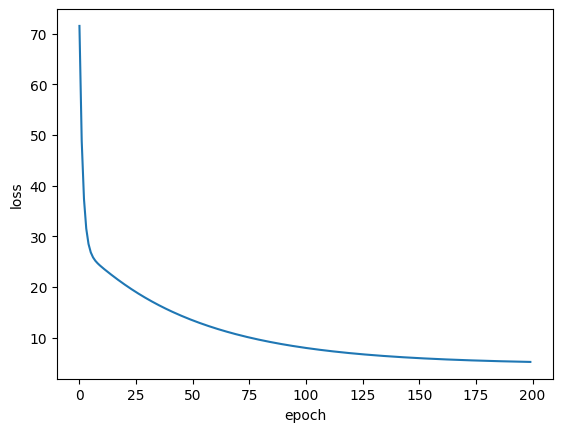

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Inference

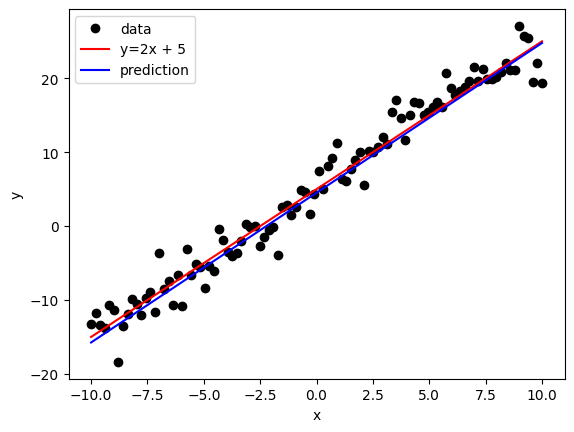

In [ ]:
# with torch.no_grad():
with torch.inference_mode():
    y_pred = model(dataset.x.to(device)).detach().cpu()

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label='prediction', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
params = []
for p in model.parameters():
  print(p)
  params.append(p.data)

Parameter containing:
tensor([[2.0263]], requires_grad=True)
Parameter containing:
tensor([4.5150], requires_grad=True)


In [ ]:
y_pred_manual = dataset.x.to(device) @ params[0].T + params[1]
y_pred_manual = y_pred_manual.detach().cpu()
torch.allclose(y_pred, y_pred_manual)

True

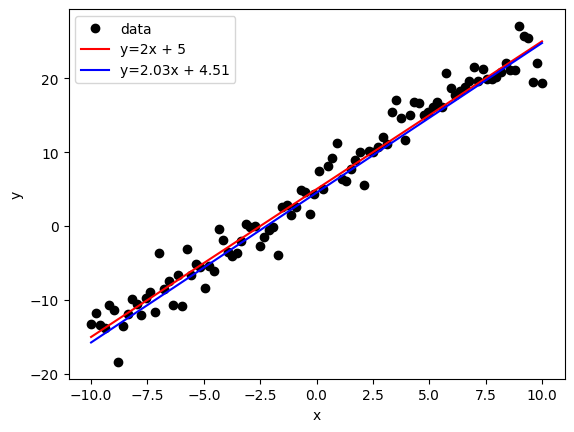

In [ ]:
if params[1].item() > 0:
  label = f'y={params[0].item():.2f}x + {params[1].item():.2f}'
else:
  label = f'y={params[0].item():.2f}x - {abs(params[1].item()):.2f}'

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label=label, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Summary

Epoch [  0], Loss: 206.4140
Epoch [ 10], Loss: 19.3750
Epoch [ 20], Loss: 16.4543
Epoch [ 30], Loss: 14.2237
Epoch [ 40], Loss: 12.3929
Epoch [ 50], Loss: 10.8966
Epoch [ 60], Loss: 9.6504
Epoch [ 70], Loss: 8.6572
Epoch [ 80], Loss: 7.8413
Epoch [ 90], Loss: 7.1697
Epoch [100], Loss: 6.6189
Epoch [110], Loss: 6.1693
Epoch [120], Loss: 5.7982
Epoch [130], Loss: 5.5053
Epoch [140], Loss: 5.2513
Epoch [150], Loss: 5.0514
Epoch [160], Loss: 4.8870
Epoch [170], Loss: 4.7511
Epoch [180], Loss: 4.6394
Epoch [190], Loss: 4.5466
Epoch [199], Loss: 4.4827


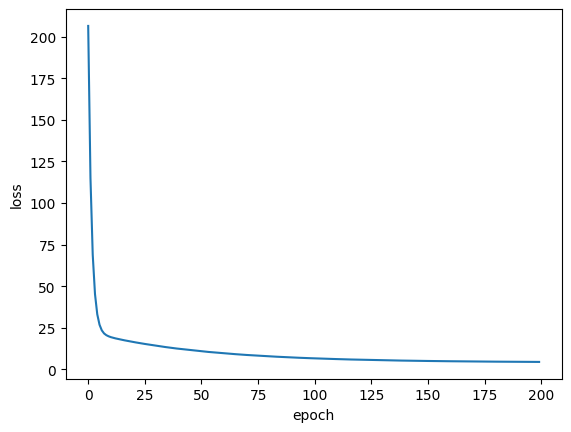

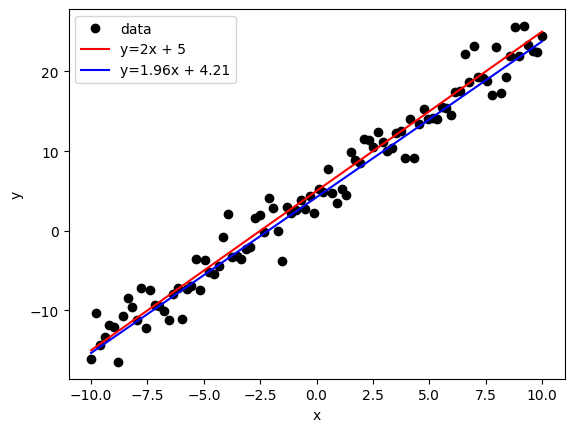

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Define Dataset
class RegressionDataset(Dataset):
    def __init__(self, N=100):
        x = torch.linspace(-10, 10, N).view(-1, 1)
        noise = torch.randn_like(x) * 2
        y = 2*x + 5 + noise
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Define Model
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Linear(1, 1)

    def forward(self, x):
        return self.model(x)

# Dataset, DataLoader
dataset = RegressionDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Model, Optimizer, Criterion
model = RegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

# Training loop
num_epochs = 200
losses = []
for epoch in range(num_epochs):
    train_loss = 0.0
    for batch in dataloader:
        x, y = batch

        # Foward propagation
        predictions = model(x)
        loss = criterion(predictions, y)

        # Backpropagation and update weights & biases
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save loss
        train_loss += loss.item()

    train_loss /= len(dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Inference
def get_label(model):
    params = []
    for p in model.parameters():
        params.append(p.data)
    if params[1].item() > 0:
      label = f'y={params[0].item():.2f}x + {params[1].item():.2f}'
    else:
      label = f'y={params[0].item():.2f}x - {abs(params[1].item()):.2f}'
    return label

with torch.inference_mode():
    y_pred = model(dataset.x)

label = get_label(model)

plt.figure()
plt.plot(dataset.x, dataset.y, 'o', label='data', color='black')
plt.plot(dataset.x, y_true(dataset.x), '-', label='y=2x + 5', color='red')
plt.plot(dataset.x, y_pred, '-', label=label, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()